In [10]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
import os
import pickle

2024-02-02 21:17:08.641375: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-02 21:17:09.275174: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-02 21:17:09.275240: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-02 21:17:09.402542: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-02 21:17:09.698538: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-02 21:17:09.760017: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [3]:
os.listdir("trainies")

['Y_9dUN.png',
 '3_Dz0C.png',
 '2_rnu7.png',
 '3_r7zb.png',
 'b_RINn.png',
 'r_trqz.png',
 'l_3NvH.png',
 'a_8R8C.png',
 'q_563T.png',
 'v_D4fz.png',
 'g_yOPK.png',
 'O_b20R.png',
 '3_qoCg.png',
 '@_SibK.png',
 '=_EWpf.png',
 'A_Tx6I.png',
 'v_mXED.png',
 'w_KMZJ.png',
 'i_wSRP.png',
 'H_NtfY.png',
 'a_7Gjl.png',
 'H_vUNA.png',
 'J_5QJz.png',
 'U_DPXc.png',
 'u_pja9.png',
 'k_sU4h.png',
 'U_lUOn.png',
 'O_zIUx.png',
 't_8MXQ.png',
 'U_zLb4.png',
 'z_12sc.png',
 '7_m0iC.png',
 'p_LK4l.png',
 'T_mPOJ.png',
 'c_oA3V.png',
 'T_gyAQ.png',
 'y_WYyA.png',
 'r_y7I9.png',
 'c_p8xM.png',
 'Y_g5j2.png',
 '2_JVU2.png',
 '5_sdZb.png',
 'B_ifrt.png',
 'g_oGlj.png',
 'g_g6pX.png',
 'g_SDNb.png',
 'G_Lgcb.png',
 'Y_yDcb.png',
 'y_GPu8.png',
 'Y_c2p0.png',
 'g_5NWV.png',
 'v_EB7k.png',
 'D_60lm.png',
 'K_G8rp.png',
 's_WUbe.png',
 '4_04i4.png',
 'x_8fCB.png',
 '7_zPTp.png',
 't_RIN7.png',
 'P_qZfK.png',
 'D_VHUE.png',
 '3_mJgx.png',
 'J_kG53.png',
 'C_pbbt.png',
 'I_92Lu.png',
 'i_pMOc.png',
 'M_yxSD.p

In [48]:
model = Sequential()
model.add(Conv2D(45, (3, 3), input_shape = (30,30,1), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))


model.add(Conv2D(45, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 64, activation = 'softmax'))


model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 45)        450       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 45)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 45)        18270     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 45)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1620)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [49]:
train_datagen = ImageDataGenerator(rescale = 1./255)

In [50]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [53]:
train_generator = train_datagen.flow_from_directory(
    directory = 'trainies',
    target_size = (30,30,1),
    batch_size = 128,
    class_mode = 'categorical'

)
test_generator = test_datagen.flow_from_directory(
    directory = 'testing',
    target_size = (30,30,1),
    batch_size = 128,
    class_mode = 'categorical'

)

Found 4002 images belonging to 64 classes.
Found 1000 images belonging to 64 classes.


In [54]:


history = model.fit_generator(train_generator,
                         steps_per_epoch = 32,
                         epochs = 15,
                         validation_data = test_generator,
                         validation_steps = 32)



/tmp/ipykernel_2160/488827890.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


ValueError: could not broadcast input array from shape (30,30,3) into shape (30,30,1,3)

In [22]:


history = model.fit_generator(train_generator,
                         steps_per_epoch = 32,
                         epochs = 15,
                         validation_data = test_generator,
                         validation_steps = 32)



Epoch 1/15


/tmp/ipykernel_2583/488827890.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


32/32 [==============================] - 3s 79ms/step - loss: 5.4684e-06 - accuracy: 1.0000
Epoch 2/15
32/32 [==============================] - 4s 124ms/step - loss: 5.3507e-06 - accuracy: 1.0000
Epoch 3/15
32/32 [==============================] - 4s 116ms/step - loss: 5.2440e-06 - accuracy: 1.0000
Epoch 4/15
32/32 [==============================] - 3s 82ms/step - loss: 5.1111e-06 - accuracy: 1.0000
Epoch 5/15
32/32 [==============================] - 4s 118ms/step - loss: 4.9973e-06 - accuracy: 1.0000
Epoch 6/15
32/32 [==============================] - 3s 82ms/step - loss: 4.8797e-06 - accuracy: 1.0000
Epoch 7/15
32/32 [==============================] - 2s 75ms/step - loss: 4.7663e-06 - accuracy: 1.0000
Epoch 8/15
32/32 [==============================] - 4s 118ms/step - loss: 4.6726e-06 - accuracy: 1.0000
Epoch 9/15
32/32 [==============================] - 3s 80ms/step - loss: 4.5636e-06 - accuracy: 1.0000
Epoch 10/15
32/32 [==============================] - 4s 121ms/step - loss: 4.460

In [22]:


history = model.fit_generator(train_generator,
                         steps_per_epoch = 32,
                         epochs = 15,
                         validation_data = test_generator,
                         validation_steps = 32)



Epoch 1/15


/tmp/ipykernel_2583/488827890.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


32/32 [==============================] - 3s 79ms/step - loss: 5.4684e-06 - accuracy: 1.0000
Epoch 2/15
32/32 [==============================] - 4s 124ms/step - loss: 5.3507e-06 - accuracy: 1.0000
Epoch 3/15
32/32 [==============================] - 4s 116ms/step - loss: 5.2440e-06 - accuracy: 1.0000
Epoch 4/15
32/32 [==============================] - 3s 82ms/step - loss: 5.1111e-06 - accuracy: 1.0000
Epoch 5/15
32/32 [==============================] - 4s 118ms/step - loss: 4.9973e-06 - accuracy: 1.0000
Epoch 6/15
32/32 [==============================] - 3s 82ms/step - loss: 4.8797e-06 - accuracy: 1.0000
Epoch 7/15
32/32 [==============================] - 2s 75ms/step - loss: 4.7663e-06 - accuracy: 1.0000
Epoch 8/15
32/32 [==============================] - 4s 118ms/step - loss: 4.6726e-06 - accuracy: 1.0000
Epoch 9/15
32/32 [==============================] - 3s 80ms/step - loss: 4.5636e-06 - accuracy: 1.0000
Epoch 10/15
32/32 [==============================] - 4s 121ms/step - loss: 4.460

(30, 30, 3)
1/1 [==============================] - 0s 74ms/step
z
(30, 30, 3)
1/1 [==============================] - 0s 32ms/step
z
(30, 30, 3)
1/1 [==============================] - 0s 24ms/step
z
(30, 30, 3)
1/1 [==============================] - 0s 28ms/step
z
(30, 30, 3)
1/1 [==============================] - 0s 22ms/step
z
(30, 30, 3)
1/1 [==============================] - 0s 32ms/step
z
(30, 30, 3)
1/1 [==============================] - 0s 26ms/step
z
(30, 30, 3)
1/1 [==============================] - 0s 32ms/step
z
(30, 30, 3)
1/1 [==============================] - 0s 27ms/step
z
(30, 30, 3)
1/1 [==============================] - 0s 34ms/step
z
(30, 30, 3)
1/1 [==============================] - 0s 54ms/step
z
(30, 30, 3)
1/1 [==============================] - 0s 23ms/step
z
(30, 30, 3)
1/1 [==============================] - 0s 27ms/step
z
(30, 30, 3)
1/1 [==============================] - 0s 23ms/step
z
(30, 30, 3)
1/1 [==============================] - 0s 28ms/step
z
(30, 30, 3

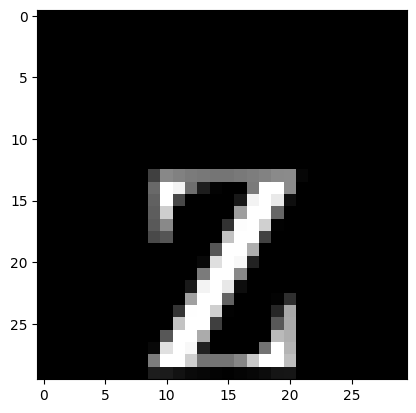

In [76]:
stri = "0123456789=@ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz"
dir_path = 'testing/z'
count = 0
ans = 0
model = pickle.load(open('CNN_model.sav','rb'))
for x in os.listdir(dir_path):
    count += 1
    correct_ans = x[0]
    path = os.path.join(dir_path, x)  # Use os.path.join for path concatenation
    test_image = image.load_img(path, target_size=(30, 30))
    plt.imshow(test_image)
    test_image = image.img_to_array(test_image)
    print(test_image.shape)
    test_image = test_image.reshape((1,) + test_image.shape)  # Reshape to (1, 30, 30, 3) for model.predict
    result = model.predict(test_image)
    predicted_index = result.argmax(axis=1)[0]  # Get the index of the predicted class
    predicted_char = stri[predicted_index]
    print(predicted_char)
    print(result)
    if predicted_char == correct_ans:
        ans += 1

accuracy = ans / count
print(accuracy)

In [76]:

result

1/1 [==============================] - 0s 40ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)

In [11]:
pickle.dump(model, open('CNN_model.sav', 'wb'))

(39, 42)
(30, 30)


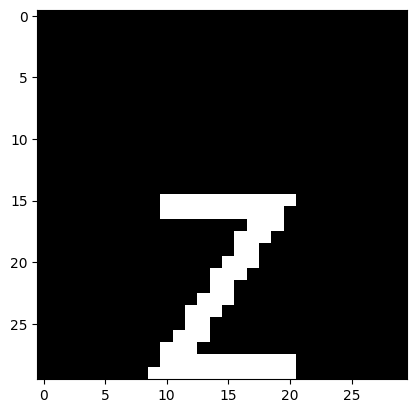

ValueError: in user code:

    File "/home/druvvv/firefoxExtension/server/venv/lib/python3.10/site-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/home/druvvv/firefoxExtension/server/venv/lib/python3.10/site-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/druvvv/firefoxExtension/server/venv/lib/python3.10/site-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/home/druvvv/firefoxExtension/server/venv/lib/python3.10/site-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/home/druvvv/firefoxExtension/server/venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/druvvv/firefoxExtension/server/venv/lib/python3.10/site-packages/keras/src/engine/input_spec.py", line 253, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential' (type Sequential).
    
    Input 0 of layer "conv2d" is incompatible with the layer: expected min_ndim=4, found ndim=2. Full shape received: (None, 30)
    
    Call arguments received by layer 'sequential' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 30), dtype=uint8)
      • training=False
      • mask=None


In [77]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
stri = "0123456789=@ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz"
model = pickle.load(open('CNN_model.sav','rb'))
def process_image(image_path):
    # Read the image
    original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    print(original_image.shape)
    # Apply thresholding
    new_array = np.where(original_image < 128 , 0 , original_image)
    thresholded_image = np.where(new_array >=128 , 255 , new_array)

    # Find contours to get the bounding box
    contours, _ = cv2.findContours(thresholded_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if contours:
        # Get the bounding box
        x, y, w, h = cv2.boundingRect(contours[0])

        # Crop to content
        cropped_image = thresholded_image[y:y+h, x:x+w]
        padded_image = cv2.copyMakeBorder(cropped_image, 15, 0, 9, 9, cv2.BORDER_CONSTANT, value=0)
        # Resize to (30, 30)
        scaled_image = cv2.resize(cropped_image, (30, 30))
        print(padded_image.shape)
        plt.imshow(padded_image, cmap='gray')
        plt.show()
        result = model.predict(padded_image)
        print(result)
        predicted_index = result.argmax(axis=1)[0]  # Get the index of the predicted class
        predicted_char = stri[predicted_index]
        print(predicted_char)
        return scaled_image

# Example usage
processed_image = process_image('anunay_z.jpg')

# Display the processed image using matplotlib


(1, 30, 30, 3)


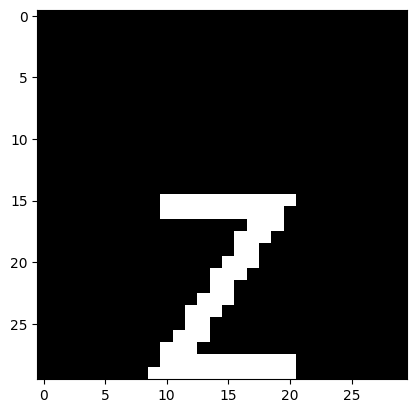

1/1 [==============================] - 0s 77ms/step
[[9.3418588e-21 1.1388939e-05 1.2106912e-02 5.9934789e-15 5.2839916e-12
  8.2896467e-11 8.7651173e-15 1.2969144e-09 1.1066557e-12 8.1337567e-12
  1.4770207e-09 7.7930961e-14 4.2498377e-10 1.3363258e-16 2.4953260e-18
  2.3299038e-26 2.4497071e-09 1.8670781e-14 1.5760564e-14 8.6392024e-16
  1.3418756e-09 1.5690485e-12 5.8426817e-15 1.0286774e-12 1.8701513e-13
  2.7703162e-10 1.3330029e-21 5.1196916e-12 1.5095643e-19 7.7407471e-13
  1.1485339e-12 3.2118724e-16 1.6627291e-16 1.8715456e-14 7.2022412e-14
  2.8319487e-09 4.4345959e-12 3.6880975e-15 6.6550783e-05 4.9727471e-09
  1.0182006e-05 2.7215823e-14 1.2326414e-08 8.6723601e-11 5.0417840e-14
  2.5532634e-07 7.2058947e-07 3.6589412e-12 1.7756631e-09 1.3715444e-14
  1.3151496e-11 9.3431495e-12 1.5232328e-12 2.9073071e-13 2.0656493e-15
  6.5386517e-04 8.9987864e-08 1.4375173e-06 1.4308457e-13 1.1481464e-08
  9.0194166e-13 9.5223368e-05 9.2642685e-09 9.8705333e-01]]
z


In [79]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pickle

# Load the model
model = pickle.load(open('CNN_model.sav', 'rb'))

def process_image(image_path):
    # Read the image
    original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
   
    # Apply thresholding
    new_array = np.where(original_image < 128, 0, original_image)
    thresholded_image = np.where(new_array >= 128, 255, new_array)

# Convert each integer to an array of size 3

    # Find contours to get the bounding box
    contours, _ = cv2.findContours(thresholded_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if contours:
        # Get the bounding box
        x, y, w, h = cv2.boundingRect(contours[0])

        # Crop to content
        cropped_image = thresholded_image[y:y+h, x:x+w]
        array_of_arrays = cropped_image[:, :,np.newaxis]

# Repeat the array along the new axis to make it size 3
        array_of_arrays = np.repeat(array_of_arrays, 3, axis=2)

        # Add padding
        padded_image = cv2.copyMakeBorder(array_of_arrays, 15, 0, 9, 9, cv2.BORDER_CONSTANT, value=0)

        # Resize to (30, 30)
        scaled_image = cv2.resize(padded_image, (30, 30))

        # Add batch and channel dimensions, and normalize
        test_image = image.img_to_array(scaled_image)
        test_image = test_image.reshape((1,) + test_image.shape)
        test_image = (test_image/255)
        print(test_image.shape)
        plt.imshow(scaled_image, cmap='gray')
        plt.show()
        # Predict using the model
        result = model.predict(test_image)
        print(result)
        predicted_index = result.argmax(axis=1)[0]  # Get the index of the predicted class
        predicted_char = stri[predicted_index]
        print(predicted_char)
        return scaled_image

# Example usage
processed_image = process_image('anunay_z.jpg')

In [80]:
train_generator.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 '=': 10,
 '@': 11,
 'A': 12,
 'B': 13,
 'C': 14,
 'D': 15,
 'E': 16,
 'F': 17,
 'G': 18,
 'H': 19,
 'I': 20,
 'J': 21,
 'K': 22,
 'L': 23,
 'M': 24,
 'N': 25,
 'O': 26,
 'P': 27,
 'Q': 28,
 'R': 29,
 'S': 30,
 'T': 31,
 'U': 32,
 'V': 33,
 'W': 34,
 'X': 35,
 'Y': 36,
 'Z': 37,
 'a': 38,
 'b': 39,
 'c': 40,
 'd': 41,
 'e': 42,
 'f': 43,
 'g': 44,
 'h': 45,
 'i': 46,
 'j': 47,
 'k': 48,
 'l': 49,
 'm': 50,
 'n': 51,
 'o': 52,
 'p': 53,
 'q': 54,
 'r': 55,
 's': 56,
 't': 57,
 'u': 58,
 'v': 59,
 'w': 60,
 'x': 61,
 'y': 62,
 'z': 63}